In [1]:
import pandas as pd
import json
import datetime as dt
import matplotlib

%matplotlib inline

## Searches

In [2]:
FACEBOOK_PATH = "./facebook/downloaded-data/"

In [3]:
with open(FACEBOOK_PATH + "logged_information/search/your_search_history.json", "r") as f:
    search_json = json.loads(f.read())

In [4]:
search_json

{'searches_v2': [{'timestamp': 1683042473,
   'attachments': [{'data': [{'text': '"lana lolos brown"'}]}],
   'data': [{'text': 'lana lolos brown'}],
   'title': 'You searched Facebook'},
  {'timestamp': 1683042474,
   'attachments': [{'data': [{'text': '"Lana Lolos Brown"'}]}],
   'data': [{'text': 'Lana Lolos Brown'}],
   'title': 'You searched Facebook'},
  {'timestamp': 1683144671,
   'attachments': [{'data': [{'text': '"gamechanger"'}]}],
   'data': [{'text': 'gamechanger'}],
   'title': 'You searched Facebook'},
  {'timestamp': 1683241607,
   'attachments': [{'data': [{'text': '"baseball"'}]}],
   'data': [{'text': 'baseball'}],
   'title': 'You searched Facebook'},
  {'timestamp': 1683241610,
   'attachments': [{'data': [{'text': '"showcase & college baseball"'}]}],
   'data': [{'text': 'showcase & college baseball'}],
   'title': 'You searched Facebook'},
  {'timestamp': 1683241612,
   'attachments': [{'data': [{'text': '"Showcase And College Baseball"'}]}],
   'data': [{'text'

In [5]:
searches = []
for s in search_json["searches_v2"]:
    try:
        s_dict = {
            "timestamp": s["timestamp"],
            "search": s["data"][0]["text"]
        }
        searches.append(s_dict)
    except:
        print(s)

In [6]:
search_df = pd.DataFrame(searches)

In [7]:
search_df.head()

,timestamp,search
0,1683042473,lana lolos brown
1,1683042474,Lana Lolos Brown
2,1683144671,gamechanger
3,1683241607,baseball
4,1683241610,showcase & college baseball


In [8]:
search_df["search"].value_counts().head()

search
John Templon       4
Louise Greco       3
Laurence Zulauf    3
Norb Caoili        2
Buffalo Bills      2
Name: count, dtype: int64

In [9]:
search_df["datetime"] = search_df["timestamp"].apply(lambda x: dt.datetime.utcfromtimestamp(x))
search_df["date"] = search_df["datetime"].apply(lambda x: x.date())

/var/folders/my/t08p_tj96nn6vf2f5f_0h3w00000gn/T/ipykernel_52934/3052569766.py:1: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  search_df["datetime"] = search_df["timestamp"].apply(lambda x: dt.datetime.utcfromtimestamp(x))


In [10]:
search_df.head()

,timestamp,search,datetime,date
0,1683042473,lana lolos brown,2023-05-02 15:47:53,2023-05-02
1,1683042474,Lana Lolos Brown,2023-05-02 15:47:54,2023-05-02
2,1683144671,gamechanger,2023-05-03 20:11:11,2023-05-03
3,1683241607,baseball,2023-05-04 23:06:47,2023-05-04
4,1683241610,showcase & college baseball,2023-05-04 23:06:50,2023-05-04


In [11]:
search_df['datetime'].min()

Timestamp('2023-05-02 15:47:53')

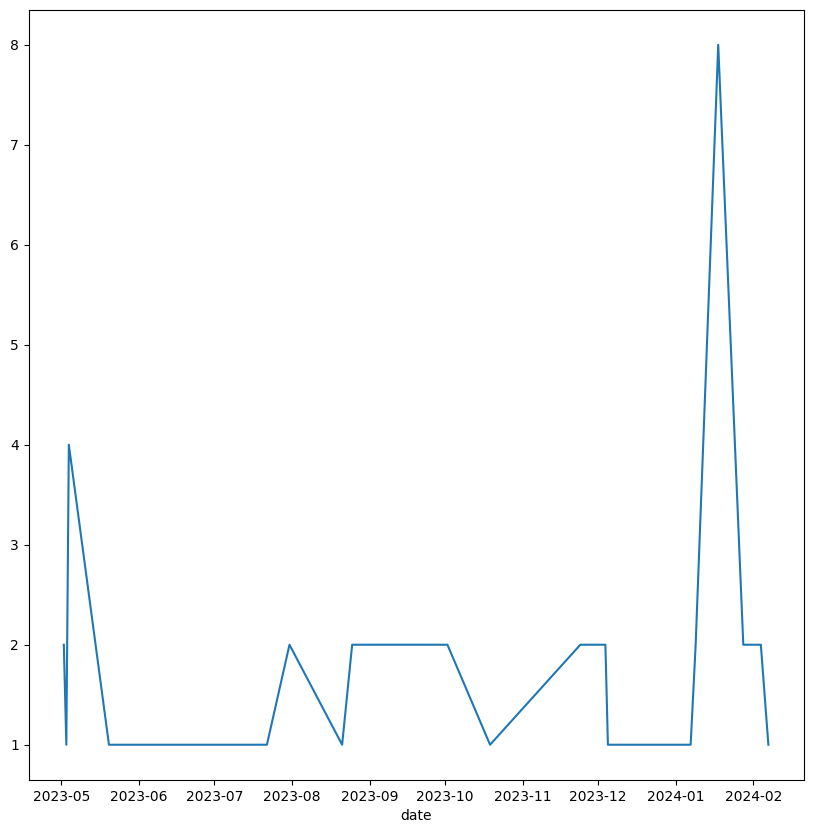

In [12]:
search_df.groupby("date")["search"].size().plot(figsize=(10,10))
pass

In [13]:
search_df.groupby("date")["search"].size().sort_values(ascending=False).head(10)

date
2024-01-18    8
2023-05-04    4
2023-05-02    2
2024-02-04    2
2024-01-28    2
2023-07-31    2
2024-01-09    2
2023-08-25    2
2023-09-24    2
2023-10-02    2
Name: search, dtype: int64

In [14]:
search_df.loc[
    lambda x: x["date"] == dt.date(2024, 1, 18)
]

,timestamp,search,datetime,date
29,1705547811,Laurence Zulauf,2024-01-18 03:16:51,2024-01-18
30,1705547824,Laurence Zulauf,2024-01-18 03:17:04,2024-01-18
31,1705547838,Louise Greco,2024-01-18 03:17:18,2024-01-18
32,1705547845,Louise Greco,2024-01-18 03:17:25,2024-01-18
33,1705547966,Laurence Zulauf,2024-01-18 03:19:26,2024-01-18
34,1705547966,Louise Greco,2024-01-18 03:19:26,2024-01-18
35,1705548041,Ruby Crester,2024-01-18 03:20:41,2024-01-18
36,1705548702,Ruby Crester,2024-01-18 03:31:42,2024-01-18


## Posts

In [15]:
with open(
    "./facebook/downloaded-data/your_activity_across_facebook/posts/your_posts__check_ins__photos_and_videos_1.json",
    "r"
) as f:
    post_json = json.loads(f.read())

In [16]:
post_json

[{'timestamp': 1206333295,
  'attachments': [{'data': [{'external_context': {'url': ''}}]}],
  'data': [{'update_timestamp': 1206333295}, {}, {}],
  'title': 'John Templon shared a photo.'},
 {'timestamp': 1236468083,
  'attachments': [{'data': [{'external_context': {'url': 'http://www.buffalorumblings.com/2009/3/7/785192/owens-in-buffalo-today'}}]}],
  'data': [{'post': "I cannot believe that the Bills did this, but I'm glad they're finally taking a chance."},
   {'update_timestamp': 1236468083},
   {},
   {}],
  'title': 'John Templon shared a link.'},
 {'timestamp': 1242254669,
  'attachments': [{'data': [{'external_context': {'url': 'http://www.collegegradrealworld.net/'}}]}],
  'data': [{'post': 'Would love it if you took the time to stop by http://www.collegegradrealworld.net/ and check out the next design'},
   {'update_timestamp': 1242254669},
   {},
   {}],
  'title': 'John Templon shared a link.'},
 {'timestamp': 1242488109,
  'attachments': [{'data': [{'external_context': {'

In [17]:
posts = []
for p in post_json:
    try:
        p_dict = {
            "timestamp": p["timestamp"],
            "post_text": p["data"][0]["post"]
        }
        posts.append(p_dict)
    except:
        print(p)

{'timestamp': 1206333295, 'attachments': [{'data': [{'external_context': {'url': ''}}]}], 'data': [{'update_timestamp': 1206333295}, {}, {}], 'title': 'John Templon shared a photo.'}
{'timestamp': 1377910267, 'attachments': [{'data': [{'external_context': {'url': 'http://www.mediabistro.com/fishbowlny/huffington-post-healthy-living-laura-schocker-medill-school_b93591'}}]}], 'data': [{'update_timestamp': 1377910267}, {}, {}], 'title': 'John Templon shared a link.'}
{'timestamp': 1382402416, 'attachments': [{'data': [{'external_context': {'url': 'http://www.nycbuckets.com/2013/10/pat-duquette-umass-lowell-coaching/'}}]}], 'data': [{'update_timestamp': 1382402416}, {}, {}], 'title': 'John Templon shared a link.'}
{'timestamp': 1391046146, 'attachments': [{'data': [{'external_context': {'url': 'http://www.nycbuckets.com/2014/01/maac-coaches-league-play/'}}]}], 'data': [{'update_timestamp': 1391046146}, {}, {}], 'title': 'John Templon shared a link.'}
{'timestamp': 1403655035, 'attachments'

In [18]:
len(posts)

587

In [19]:
post_df = pd.DataFrame(posts)

In [20]:
post_df.head()

,timestamp,post_text
0,1236468083,"I cannot believe that the Bills did this, but ..."
1,1242254669,Would love it if you took the time to stop by ...
2,1242488109,Wrote this for Chicago College Basketball. Hap...
3,1243571340,Yesterday was my 3-year bloggerversary. http:/...
4,1246330265,just wrote about what John Shurna and Kyle Row...


In [21]:
post_df["datetime"] = post_df["timestamp"].apply(lambda x: dt.datetime.utcfromtimestamp(x))
post_df["date"] = post_df["datetime"].apply(lambda x: x.date())
post_df["year"] = post_df["datetime"].apply(lambda x: x.year)

/var/folders/my/t08p_tj96nn6vf2f5f_0h3w00000gn/T/ipykernel_52934/1170898186.py:1: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  post_df["datetime"] = post_df["timestamp"].apply(lambda x: dt.datetime.utcfromtimestamp(x))


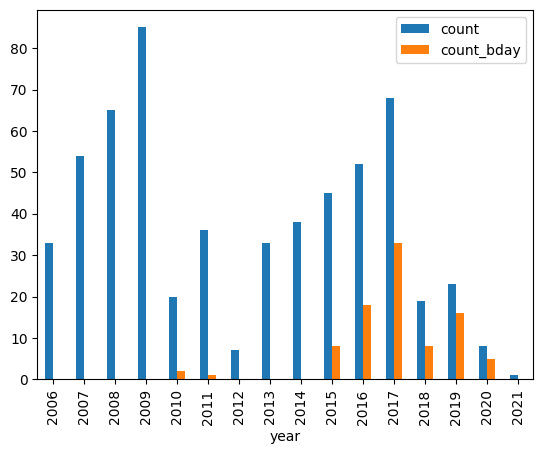

In [22]:
new_post_df = post_df["year"].value_counts().to_frame()
birthday_post_df = post_df.loc[
        lambda x: x["post_text"].apply(lambda x: x.upper()).str.contains("HAPPY BIRTHDAY")
    ]["year"].value_counts().to_frame()

posts_df = new_post_df.join(birthday_post_df, rsuffix="_bday").fillna(0)
posts_df.sort_index().plot(kind="bar")
pass

## Login and Logouts

In [23]:
with open("./facebook/downloaded-data/security_and_login_information/logins_and_logouts.json", "r") as f:
    logs_df = pd.DataFrame(json.loads(f.read())["account_accesses_v2"])

In [24]:
logs_df.head()

,action,timestamp,site,ip_address
0,Login,1708131447,www.facebook.com,65.78.7.140
1,Log out,1708131447,www.facebook.com,65.78.7.140
2,Log out,1708128137,www.facebook.com,65.78.7.140
3,Log out,1708127748,www.facebook.com,65.78.7.140
4,Login,1708127748,www.facebook.com,65.78.7.140


In [25]:
logs_df["ip_address"].value_counts()

ip_address
65.78.7.140    7
Name: count, dtype: int64

## Profile Info

In [26]:
with open("./facebook/downloaded-data/personal_information/profile_information/profile_information.json", "r") as f:
    profile = json.loads(f.read())

In [28]:
profile

{'profile_v2': {'name': {'full_name': 'John Templon',
   'first_name': 'John',
   'middle_name': '',
   'last_name': 'Templon'},
  'emails': {'emails': ['jtemplon@gmail.com',
    'johntemplon2008@u.northwestern.edu',
    '38templon@cua.edu'],
   'previous_emails': ['jtemplon@facebook.com'],
   'pending_emails': [],
   'ad_account_emails': []},
  'birthday': {'year': 1984, 'month': 6, 'day': 29},
  'gender': {'gender_option': 'MALE', 'pronoun': 'MALE'},
  'previous_names': [],
  'other_names': [],
  'current_city': {'name': 'New York, New York', 'timestamp': 0},
  'hometown': {'name': 'Pennington, New Jersey', 'timestamp': 0},
  'relationship': {'status': 'Married',
   'partner': 'Laura Schocker',
   'anniversary': {'year': 2015, 'month': 10, 'day': 17},
   'timestamp': 1445172981},
  'previous_relationships': [{'name': 'Rachel Crowley', 'timestamp': 0}],
  'family_members': [{'name': 'Patricia Pinto Fiore',
    'relation': 'Family member',
    'timestamp': 1404016419},
   {'name': 'Mat

## Facebook Event

In [29]:
with open("./facebook/downloaded-data/your_activity_across_facebook/events/your_event_responses.json", "r") as f:
    events = json.loads(f.read())

In [30]:
events

{'event_responses_v2': {'events_joined': [{'name': 'Poker Night',
    'start_timestamp': 1549760400,
    'end_timestamp': 0},
   {'name': 'My bday party! ',
    'start_timestamp': 1512270000,
    'end_timestamp': 0},
   {'name': "Jess' Birthday Cry-fest Non-Celebration",
    'start_timestamp': 1479522600,
    'end_timestamp': 0},
   {'name': 'Birthday ball',
    'start_timestamp': 1383442200,
    'end_timestamp': 0},
   {'name': 'Birthday party tomorrow!',
    'start_timestamp': 1352601000,
    'end_timestamp': 0},
   {'name': "Laura's 27th Birthday Party!",
    'start_timestamp': 1351303200,
    'end_timestamp': 1351312200},
   {'name': "Richard's 30th!",
    'start_timestamp': 1329015600,
    'end_timestamp': 0},
   {'name': "Laura's 26th Birthday Party!",
    'start_timestamp': 1320436800,
    'end_timestamp': 1320458400},
   {'name': "New Year's Eve",
    'start_timestamp': 1293843600,
    'end_timestamp': 1293901200},
   {'name': "Laura's 25th Birthday Bar/Game Night",
    'start_

In [31]:
events_df = pd.DataFrame.from_dict(events["event_responses_v2"]["events_joined"])

In [32]:
events_df.head()

,name,start_timestamp,end_timestamp,place,description,create_timestamp
0,Poker Night,1549760400,0,NaN,NaN,NaN
1,My bday party!,1512270000,0,NaN,NaN,NaN
2,Jess' Birthday Cry-fest Non-Celebration,1479522600,0,NaN,NaN,NaN
3,Birthday ball,1383442200,0,NaN,NaN,NaN
4,Birthday party tomorrow!,1352601000,0,NaN,NaN,NaN


In [33]:
events_df["datetime"] = events_df["start_timestamp"].apply(lambda x: dt.datetime.utcfromtimestamp(x))

/var/folders/my/t08p_tj96nn6vf2f5f_0h3w00000gn/T/ipykernel_52934/2687677400.py:1: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  events_df["datetime"] = events_df["start_timestamp"].apply(lambda x: dt.datetime.utcfromtimestamp(x))


In [34]:
events_df

,name,start_timestamp,end_timestamp,place,description,create_timestamp,datetime
0,Poker Night,1549760400,0,NaN,NaN,NaN,2019-02-10 01:00:00
1,My bday party!,1512270000,0,NaN,NaN,NaN,2017-12-03 03:00:00
2,Jess' Birthday Cry-fest Non-Celebration,1479522600,0,NaN,NaN,NaN,2016-11-19 02:30:00
3,Birthday ball,1383442200,0,NaN,NaN,NaN,2013-11-03 01:30:00
4,Birthday party tomorrow!,1352601000,0,NaN,NaN,NaN,2012-11-11 02:30:00
5,Laura's 27th Birthday Party!,1351303200,1351312200,NaN,NaN,NaN,2012-10-27 02:00:00
6,Richard's 30th!,1329015600,0,NaN,NaN,NaN,2012-02-12 03:00:00
7,Laura's 26th Birthday Party!,1320436800,1320458400,NaN,NaN,NaN,2011-11-04 20:00:00
8,New Year's Eve,1293843600,1293901200,NaN,NaN,NaN,2011-01-01 01:00:00
9,Laura's 25th Birthday Bar/Game Night,1288380600,1288396800,NaN,NaN,NaN,2010-10-29 19:30:00


---

---

---